# 911 Calls Analysis in the Montgomery County, PA 
### Author: Gonzalo Salazar
### Description: Practice with data visualization libraries, plus Pandas and NumPy
### Source: Kaggle

#### Loading libraries, setting WD and loading main data base 

In [26]:
### LIBRARIES ###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### SETTING WORKING DIRECTORY ###
print(os.getcwd())
os.chdir('/Users/gsalazar/Documents/C_Codes/Coding-Projects/Kaggle_911Calls/')

### LOADING DATA
df = pd.read_csv('./911.csv')

/Users/gsalazar/Documents/C_Codes/Coding-Projects/Kaggle_911Calls


#### Describing data
-> Checking data types and # of observations

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


-> Checking the first five observations

In [30]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


-> Top-5 zipcodes for emergency calls

In [32]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

-> Top-5 townships (twp) for emergency calls

In [34]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

-> Unique title codes [title column]

In [36]:
#df['title'].unique().size
df['title'].nunique()

110

#### Adding new features
-> Creating a reason column

In [38]:
#df['Reason'] = df['title'].apply(lambda x: 'EMS' if x[:3]=='EMS' else('Fire' if x[:4]=='Fire' else 'Traffic'))  # use in case the data set does not followed the already known pattern
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0]) 

-> Most common reason for emergency call

In [40]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

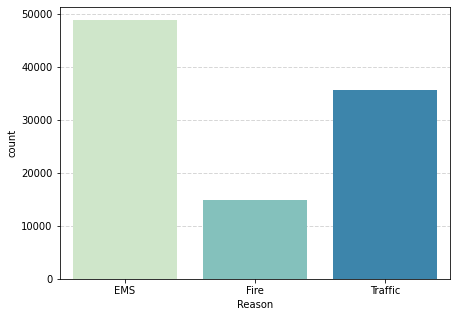

In [42]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'Reason', data = df, palette = 'GnBu')
ax.grid(axis = 'y', alpha=.5, linestyle='dashed', linewidth=1)
ax.set_axisbelow(True)
plt.show()

-> Checking data type of the object in the timeStamp column.

In [44]:
type(df['timeStamp'][0])

str

-> Converting timeStamp from string to datetime data type

In [46]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

-> Creating new columns for hour, month and day of the week

In [48]:
# Inefficient way to do it
# hour = []
# month = []
# dow = []

# for i in range(df.shape[0]):
#     time = df['timeStamp'].iloc[i]
#     hour.append(time.hour)
#     month.append(time.month)
#     dow.append(time.dayofweek)

# df['Hour'] = hour
# df['Month'] = month
# df['DayOfWeekHour'] = dow

# Efficient way to do it
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['DOW'] = df['timeStamp'].apply(lambda x: x.dayofweek)

dsow = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = list(map(lambda x: dsow[x],df['DOW']))
#df.replace({'DOW': dsow})  # another way to remap values in pandas column with a dict

-> Number of emergency calls by day of the week and reason

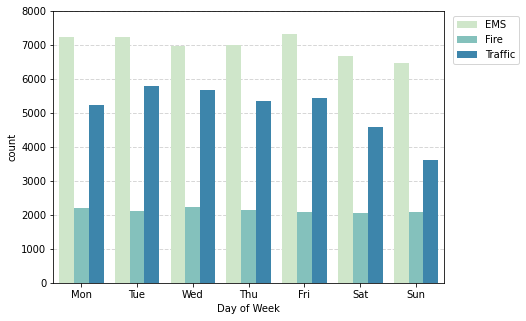

In [50]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'Day of Week', data = df, hue = 'Reason', 
                   order = dsow.values(), palette = 'GnBu')
ax.legend(bbox_to_anchor= (1.01,1), loc = 0)
ax.grid(axis = 'y', alpha=.5, linestyle='dashed', linewidth=1)
ax.set_axisbelow(True)
ax.set_ylim([0,8000])
plt.show()

-> Number of emergency calls by month and reason

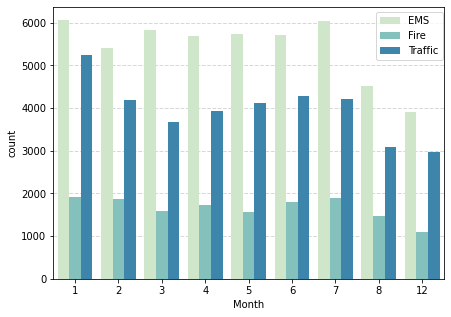

In [52]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x = 'Month', data = df, hue = 'Reason', order = sorted(df['Month'].unique()), palette = 'GnBu')
ax.legend(bbox_to_anchor= (1.01,1), loc = 0)
ax.grid(axis = 'y', alpha=.5, linestyle='dashed', linewidth=1)
ax.set_axisbelow(True)
#ax.set_ylim([0,8000])
plt.show()

-> Number of emergency calls by month and reason (adding missing months)

--> Aggregating data by month using count()

In [54]:
byMonth = df.groupby('Month')
call_by_month = byMonth.count()
call_by_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DOW,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


--> Number of emergency calls by months (note: there is no missing month)

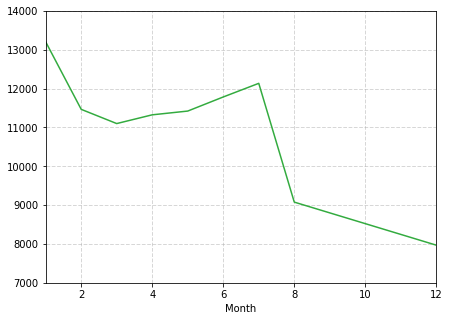

In [56]:
plt.figure(figsize=(7,5))
ax = call_by_month['Reason'].plot(color = '#33AB3F')
ax.grid(alpha=.5, linestyle='dashed', linewidth=1)
ax.set_axisbelow(True)
ax.set_ylim([7000,14000])
ax.set_xlim([1,12])
plt.show()

-> Relationship emergency calls vs months

In [58]:
# Reseting index to make 'Month' a column
call_by_month.reset_index('Month',inplace=True)

KeyError: 'Requested level (Month) does not match index name (None)'

<Figure size 504x360 with 0 Axes>

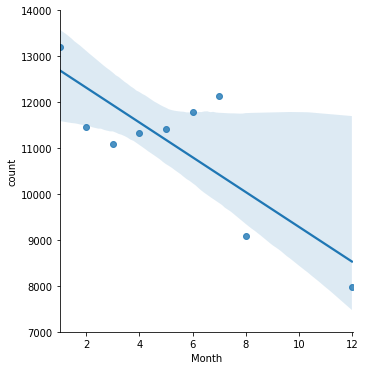

In [59]:
#sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
ax = sns.lmplot(x = 'Month', y = 'Reason', data = call_by_month, palette = 'Greens')
ax.set(ylim = (7000,14000), xlim = (1,12.05))
ax.set_ylabels('count')
plt.show()

-> Adding a new column containing only the date

In [60]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

-> Total emergency calls in time

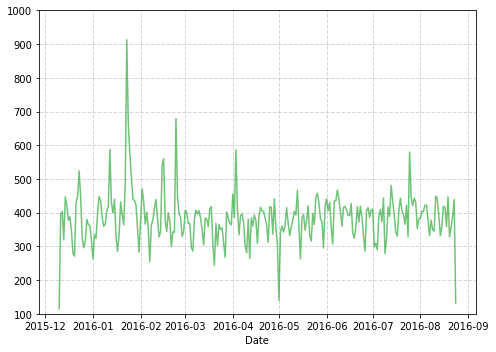

In [61]:
call_by_date = df.groupby('Date').count()
call_by_date.head()

plt.figure(figsize=(7,5))
ax = call_by_date['Reason'].plot.line(color = '#33AB3F',alpha = 0.7)
ax.grid(alpha=.5, linestyle='dashed', linewidth=1)
ax.set_axisbelow(True)
ax.set_ylim([100,1000])
plt.tight_layout()  # fixes overlapping layouts
plt.show()

-> Total emergency calls in time, by reason

In [62]:
call_by_date_reason = df.groupby(['Date','Reason']).count()
call_by_date_reason.reset_index('Reason',inplace=True)
call_by_date_reason.head()


,Reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,DOW,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10,EMS,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-10,Fire,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-10,Traffic,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,EMS,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-11,Fire,69,69,69,59,69,69,68,68,69,69,69,69,69


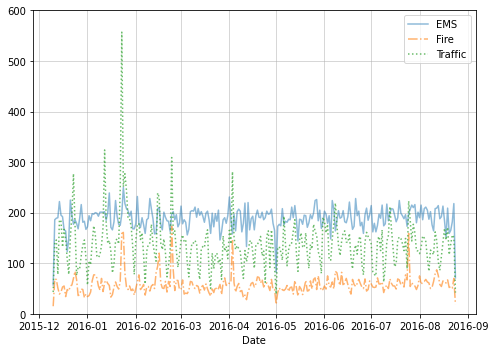

In [63]:
plt.figure(figsize=(7,5))
ax = call_by_date_reason[call_by_date_reason['Reason']=='EMS']['DOW'].plot.line(alpha = .5, label = 'EMS')
ax1 = call_by_date_reason[call_by_date_reason['Reason']=='Fire']['DOW'].plot.line(alpha = .6, ls = '-.', label = 'Fire')
ax2 = ax1 = call_by_date_reason[call_by_date_reason['Reason']=='Traffic']['DOW'].plot.line(alpha = .7, ls = ':', label = 'Traffic')
ax.grid(alpha=.5, linewidth=1)
ax.set_axisbelow(True)
ax.set_ylim([0,600])
plt.legend()
plt.tight_layout()  # fixes overlapping layouts
plt.show()

-> Comparing emergency calls by day of the week and hour

In [64]:
df1 = df.groupby(['Day of Week','Hour']).count()['title']
df1 = df1.unstack(level = -1)
df1 = df1.reindex(list(dsow.values()))
df1

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


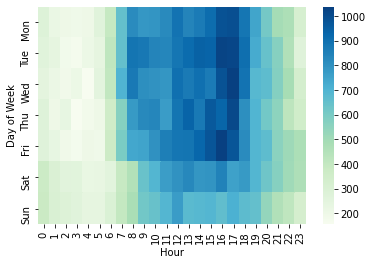

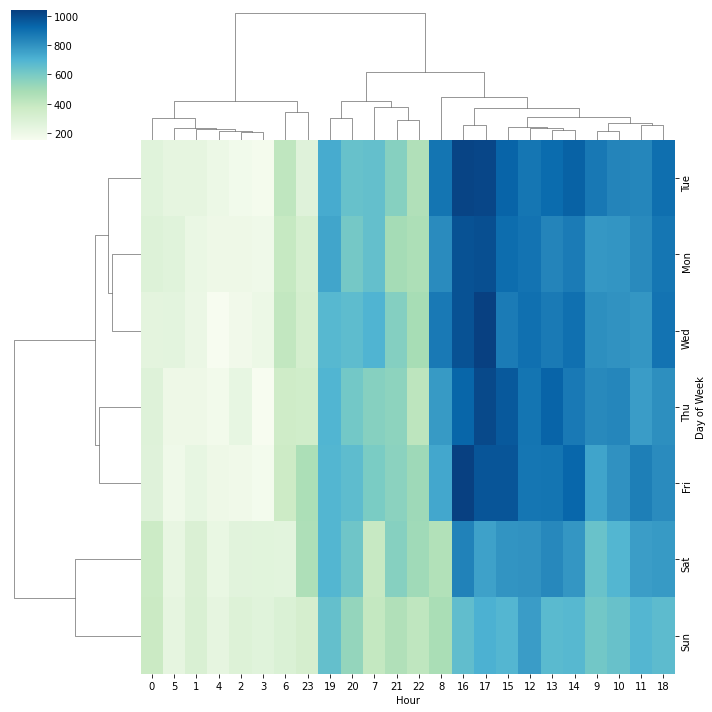

In [65]:
sns.heatmap(df1, cmap = 'GnBu', linecolor = 'white')
sns.clustermap(df1, cmap = 'GnBu', linecolor = 'white')

-> Comparing emergency calls by day of the week and month

In [66]:
df2 = df.groupby(['Day of Week','Month']).count()['title']
df2 = df2.unstack(level = -1)
df2 = df2.reindex(list(dsow.values()))

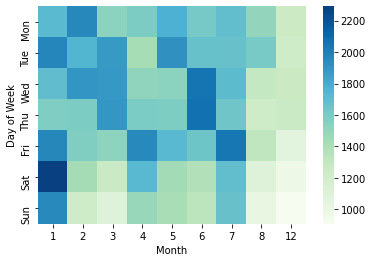

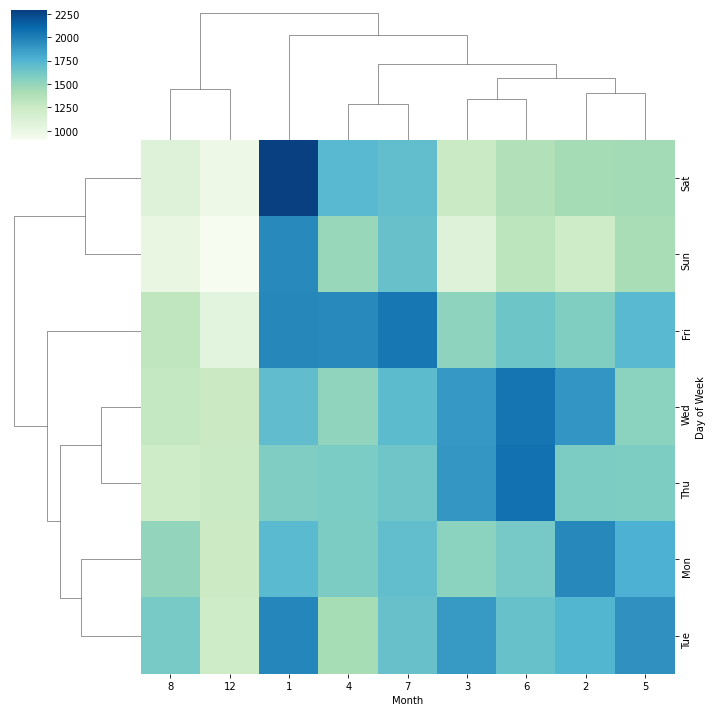

In [67]:
sns.heatmap(df2, cmap = 'GnBu', linecolor = 'white')
sns.clustermap(df2, cmap = 'GnBu', linecolor = 'white')